In [9]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [10]:
## OXY -- OCCIDENTAL PETROLEUM 
ticker = "AAPL"
start_date = "2019-03-31"
end_date = "2022-03-31"


## download the data from yahoo finance
stock_data = yf.download(ticker, start = start_date, end= end_date)

## reset the index
stock_data = stock_data.reset_index()

## remove the trailing space explicitly rename my columns
#stock_data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

## changing the date format
#stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')

## show the data
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2019-04-01,45.860703,45.966215,45.174854,45.956624,111448000
1,2019-04-02,46.527359,46.632875,45.815132,45.824723,91062800
2,2019-04-03,46.846306,47.122082,46.318727,46.342710,93087200
3,2019-04-04,46.927834,47.090901,46.316325,46.712005,76457200
4,2019-04-05,47.241978,47.265960,46.985382,47.110083,74106400
...,...,...,...,...,...,...
752,2022-03-24,171.482758,171.551709,167.680129,168.517486,90131400
753,2022-03-25,172.123108,172.674782,170.182387,171.295597,80546200
754,2022-03-28,172.990036,173.118094,169.443537,169.611009,90371900


In [11]:
## exploratory data analysis
## check for null values
stock_data.isnull().sum()

Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [12]:
## statistics
stock_data.describe().T

,,count,mean,min,25%,50%,75%,max,std
Price,Ticker,,,,,,,,
Date,,757,2020-09-28 20:51:40.660502272,2019-04-01 00:00:00,2019-12-30 00:00:00,2020-09-29 00:00:00,2021-06-30 00:00:00,2022-03-30 00:00:00,NaN
Close,AAPL,757.0,103.88027,41.718594,64.640602,112.808746,137.297928,179.076584,40.399591
High,AAPL,757.0,105.013336,42.830767,64.956429,114.370617,138.918341,179.991605,40.838251
Low,AAPL,757.0,102.609389,40.989181,63.745895,111.2908,135.129956,176.233164,39.915537
Open,AAPL,757.0,103.772675,42.23376,64.36879,112.991152,137.022217,179.686603,40.391873
Volume,AAPL,757.0,117487820.343461,41000000.0,81312200.0,103026500.0,137310400.0,426510000.0,56439358.938723


In [13]:
## correlation between the variables
corr_matrix = stock_data[['Adj Close', 'Close',	'High',	'Low',	'Open',	'Volume']].corr()
corr_matrix

KeyError: "['Adj Close'] not in index"

<Axes: >

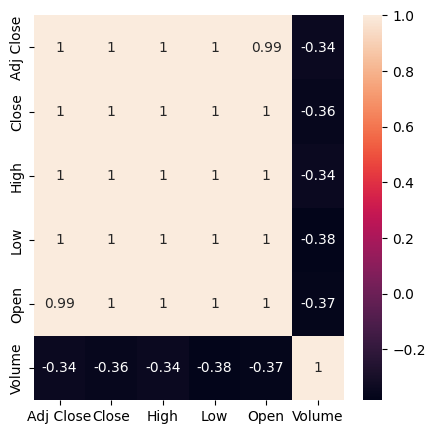

In [25]:
## visualize the correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True)

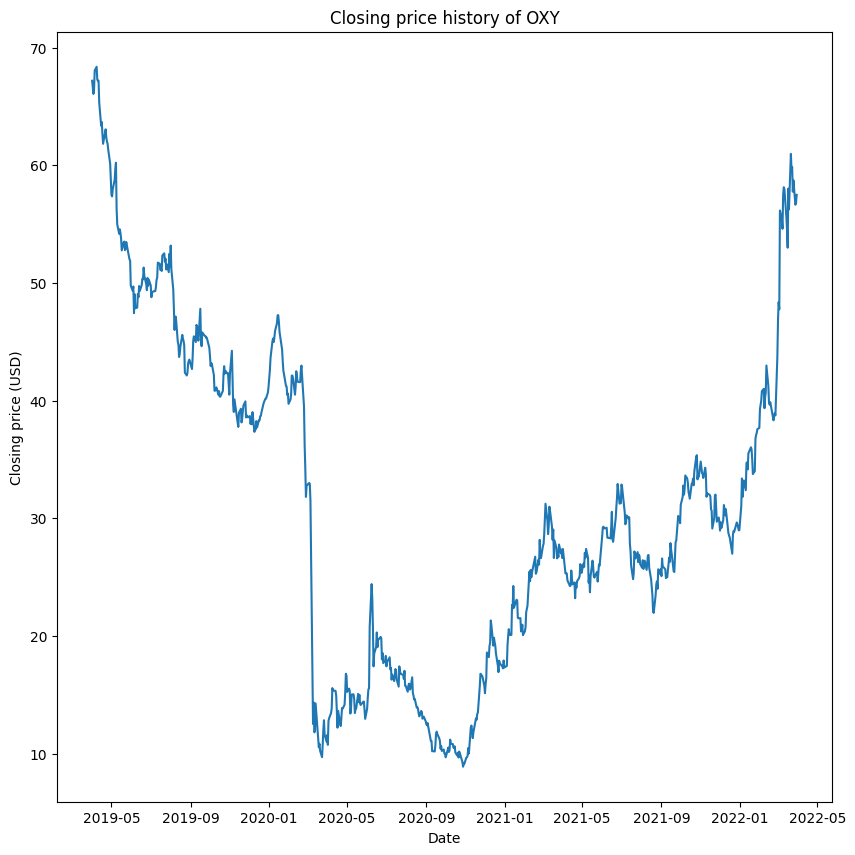

In [26]:
## visualization of the closing price and the date
plt.figure(figsize=(10,10))
plt.title('Closing price history of OXY')
plt.plot(stock_data['Date'], stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price (USD)')
plt.show()

In [27]:
stock_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-04-01 00:00:00+00:00,59.639023,67.180000,67.279999,66.540001,66.889999,2809900
1,2019-04-02 00:00:00+00:00,59.150761,66.629997,67.629997,66.190002,67.209999,3312400
2,2019-04-03 00:00:00+00:00,58.644749,66.059998,67.230003,65.839996,67.230003,3056700
3,2019-04-04 00:00:00+00:00,58.982094,66.440002,66.620003,65.570000,66.110001,2855700
4,2019-04-05 00:00:00+00:00,60.402481,68.040001,68.360001,66.650002,66.660004,3808400


In [30]:
## build the machine learning algorithm
X = stock_data[['Adj Close', 'High', 'Low', 'Open', 'Volume']].values
y = stock_data['Close'].values

In [34]:
## data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
X_train

array([[3.75560684e+01, 4.04199982e+01, 3.94399986e+01, 3.97000008e+01,
        8.72790000e+06],
       [4.53214073e+01, 5.03899994e+01, 4.94500008e+01, 5.00800018e+01,
        7.59470000e+06],
       [2.59067020e+01, 2.72600002e+01, 2.62199993e+01, 2.62199993e+01,
        2.17934000e+07],
       ...,
       [1.36607275e+01, 1.42900000e+01, 1.27500000e+01, 1.33500004e+01,
        3.99725000e+07],
       [1.79167900e+01, 1.94799995e+01, 1.84500008e+01, 1.90699997e+01,
        3.82066000e+07],
       [3.80053825e+01, 4.30099983e+01, 4.18300018e+01, 4.29399986e+01,
        8.30420000e+06]])

In [42]:
## feature scaling
## standard scaler - mean of 0 and a standard deviation of 1
## minmaxscaler ---- min, max 0, 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [46]:
## multi linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
## prediction on the test set
y_pred_mlr = lin_reg.predict(X_test)

In [49]:
## put in a dataframe
pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr })

,Actual value,Predicted value
0,11.900000,11.797954
1,45.580002,45.483658
2,14.580000,14.678448
3,27.459999,27.745245
4,17.400000,17.586668
...,...,...
147,40.500000,40.895255
148,27.760000,27.351190
149,13.040000,12.793556
150,47.130001,46.087310


In [58]:
## model evaluation 
## r2, mean absolute error, mean square error, root mean square error
## 0, 1
## mae must have a lower mae 0. 
## mse --o.
## rmse 0. 
r2 = metrics.r2_score(y_test, y_pred_mlr)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)





R2: 0.9994059477660601
Mean Absolute Error: 0.2580842622593515
Mean Square Error: 0.1405458594404605
Root Mean Square Error: 0.37489446440359786


In [65]:
## support vector regression
## radial basis function 
svr = SVR(kernel= 'linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [66]:
## prediction on the test data
y_pred_svr = svr.predict(X_test)

In [67]:
## put in a dataframe
pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_svr })

,Actual value,Predicted value
0,11.900000,11.947955
1,45.580002,45.171502
2,14.580000,14.751089
3,27.459999,27.794453
4,17.400000,17.550786
...,...,...
147,40.500000,40.881172
148,27.760000,27.569290
149,13.040000,12.791383
150,47.130001,46.213689


In [68]:
r2 = metrics.r2_score(y_test, y_pred_svr)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_svr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_svr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

R2: 0.9992109321082739
Mean Absolute Error: 0.31016007763946934
Mean Square Error: 0.18668429923070073
Root Mean Square Error: 0.4320697851397396


In [70]:
## random forest regression
reg = RandomForestRegressor(n_estimators=10)
reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [71]:
## prediction on the test data
y_pred_rf = reg.predict(X_test)

In [72]:
## put in a dataframe
pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_rf })

,Actual value,Predicted value
0,11.900000,12.063000
1,45.580002,45.302999
2,14.580000,14.716000
3,27.459999,27.546000
4,17.400000,17.420000
...,...,...
147,40.500000,40.818000
148,27.760000,27.723999
149,13.040000,13.022000
150,47.130001,45.841000


In [73]:
r2 = metrics.r2_score(y_test, y_pred_rf)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_rf)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_rf)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

R2: 0.9991496647413132
Mean Absolute Error: 0.2353092708085712
Mean Square Error: 0.20117944671636098
Root Mean Square Error: 0.44853031861442877


In [ ]:
## ## Apple - AAPL
## MICROSOFT - MSFT
## TESLA --- TSLA